In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
drought = pd.read_csv("가뭄.csv",encoding="cp949")
drought.head(5)

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28


In [85]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
#print(drought.info())
#print(drought.isnull().sum())

drought["피해년도"]=pd.to_datetime(drought["피해시작일"]).dt.year
drought.head(5)

,시도,시군구,읍면동,피해유형,피해인구,피해시작일,피해종료일,피해년도
0,전라남도,완도군,청산면,제한급수,1200,2007-10-15,2008-04-21,2007
1,전라남도,완도군,보길면,제한급수,1800,2007-12-10,2008-05-28,2007
2,전라남도,완도군,노화읍,제한급수,1500,2007-12-10,2008-05-28,2007
3,경상북도,의성군,사곡면,운반급수,88,2008-01-08,2008-04-08,2008
4,전라남도,완도군,소안면,제한급수,2458,2008-02-12,2008-05-28,2008


In [18]:
drought_year = drought.groupby(drought["피해년도"], as_index =False)["피해시작일"].count()
drought_year.rename(columns = {'피해시작일':'피해건수'},inplace=True)
drought_year

,피해년도,피해건수
0,2007,3
1,2008,11
2,2009,57
3,2010,9
4,2011,45
5,2012,59
6,2013,22
7,2014,105
8,2015,216
9,2016,147


<BarContainer object of 14 artists>

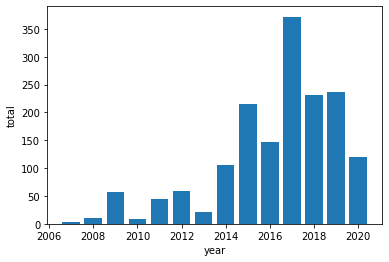

In [19]:
plt.xlabel("year")
plt.ylabel("total")
plt.bar(drought_year["피해년도"],drought_year["피해건수"])

In [20]:
year_avg_drought= drought.groupby("피해년도").mean()
year_avg_drought

,피해인구
피해년도,
2007,1500.000000
2008,1185.909091
2009,1126.912281
2010,589.222222
2011,187.822222
2012,86.559322
2013,995.454545
2014,241.942857
2015,511.115741


In [21]:
temperature=pd.read_csv("기온.csv",encoding="cp949").T
temperature.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
행정구역별(1),전국(평균),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2000,12.5,12.7,14.9,14.2,11.7,13.5,12.4,14.3,-,11.6,10.8,11.2,11.7,12.0,13.2,12.2,13.5,15.7
2001,12.7,12.8,15.3,14.8,11.5,13.8,13.1,14.6,-,11.4,10.8,11.6,12.2,12.4,13.5,12.2,13.5,15.7
2002,12.6,12.9,14.7,14.1,11.6,13.9,13.3,14.4,-,11.3,10.7,11.5,12.1,12.5,13.3,12.0,13.6,16.0
2003,12.5,12.8,14.3,13.8,11.3,13.6,13.2,14.3,-,11.5,10.5,11.5,12.0,12.3,13.2,11.8,13.5,16.3


In [22]:
temperature = temperature.rename(columns=temperature.iloc[0])
temperature = temperature.drop(temperature.index[0])
temperature.head(5)

,전국(평균),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주특별자치도
2000,12.5,12.7,14.9,14.2,11.7,13.5,12.4,14.3,-,11.6,10.8,11.2,11.7,12.0,13.2,12.2,13.5,15.7
2001,12.7,12.8,15.3,14.8,11.5,13.8,13.1,14.6,-,11.4,10.8,11.6,12.2,12.4,13.5,12.2,13.5,15.7
2002,12.6,12.9,14.7,14.1,11.6,13.9,13.3,14.4,-,11.3,10.7,11.5,12.1,12.5,13.3,12.0,13.6,16.0
2003,12.5,12.8,14.3,13.8,11.3,13.6,13.2,14.3,-,11.5,10.5,11.5,12.0,12.3,13.2,11.8,13.5,16.3
2004,13.2,13.3,14.9,14.8,12.0,14.3,13.9,15.2,-,11.8,11.4,12.1,12.5,12.7,13.7,12.7,14.3,16.4


In [23]:
temperature.index

Index(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021'],
      dtype='object')

In [24]:
temperature["전국(평균)"]

2000    12.5
2001    12.7
2002    12.6
2003    12.5
2004    13.2
2005    12.3
2006    12.9
2007    13.2
2008    12.9
2009    13.0
2010    12.7
2011    12.4
2012    12.3
2013    12.9
2014    13.1
2015    13.4
2016    13.6
2017    13.1
2018    13.0
2019    13.3
2020    13.0
2021    13.3
Name: 전국(평균), dtype: object

<BarContainer object of 22 artists>

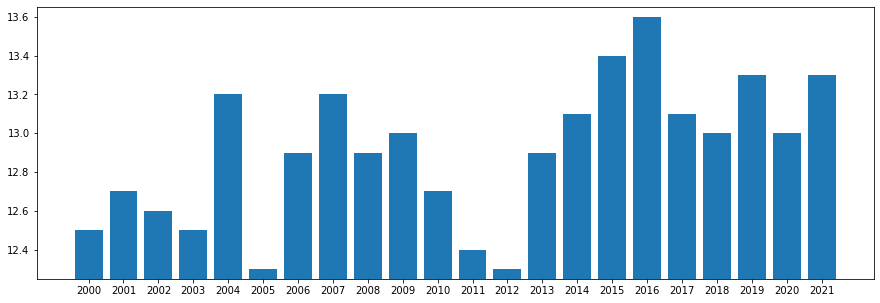

In [25]:
temperature["전국(평균)"]=temperature["전국(평균)"].astype("str")
temperature["전국(평균)"]=temperature["전국(평균)"].astype("float")
plt.figure(figsize=(15, 5)) 
plt.ylim([12.25, 13.65]) 
plt.bar(temperature.index,temperature["전국(평균)"])

#한국의 대기중 탄소농도

##2021

In [27]:
data = pd.read_csv("2021.csv", encoding="CP949")
weather21 = data

# 데이터프레임의 크기를 확인합니다.
print(weather21.shape)

# 데이터프레임 상위 5개 값 확인
weather21.head()

(12, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2021-01,422.906346,1998.365904,334.729170,NaN,NaN,NaN,10.770805
1,115,2021-02,424.383796,2003.567406,334.739103,NaN,NaN,NaN,10.837199
2,115,2021-03,423.666714,2000.014238,335.010754,NaN,NaN,NaN,10.885996
3,115,2021-04,424.759172,1986.629229,335.286601,NaN,NaN,NaN,10.964939
4,115,2021-05,423.870965,1989.843603,335.407144,NaN,NaN,NaN,11.163697


In [28]:
weather21.fillna(0).head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2021-01,422.906346,1998.365904,334.729170,0.0,0.0,0.0,10.770805
1,115,2021-02,424.383796,2003.567406,334.739103,0.0,0.0,0.0,10.837199
2,115,2021-03,423.666714,2000.014238,335.010754,0.0,0.0,0.0,10.885996
3,115,2021-04,424.759172,1986.629229,335.286601,0.0,0.0,0.0,10.964939
4,115,2021-05,423.870965,1989.843603,335.407144,0.0,0.0,0.0,11.163697


In [29]:
year21 = weather21['평균 이산화탄소(CO2) 배경대기농도(ppm)'].sum() / 12
year21

420.81227679652653

##2020

In [30]:
data = pd.read_csv("2020.csv", encoding="CP949")
weather20 = data

# 데이터프레임의 크기를 확인합니다.
print(weather20.shape)

# 데이터프레임 상위 5개 값 확인
weather20.head()

(12, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2020-01,420.3,1981,333.9,NaN,NaN,NaN,NaN
1,115,2020-02,421.3,1982,333.6,NaN,NaN,NaN,NaN
2,115,2020-03,421.6,1979,333.3,NaN,NaN,NaN,NaN
3,115,2020-04,422.9,1967,334.6,NaN,NaN,NaN,10.2
4,115,2020-05,419.1,1968,335.5,NaN,NaN,NaN,10.4


In [31]:
weather20.fillna(0).head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2020-01,420.3,1981,333.9,0.0,0.0,0.0,0.0
1,115,2020-02,421.3,1982,333.6,0.0,0.0,0.0,0.0
2,115,2020-03,421.6,1979,333.3,0.0,0.0,0.0,0.0
3,115,2020-04,422.9,1967,334.6,0.0,0.0,0.0,10.2
4,115,2020-05,419.1,1968,335.5,0.0,0.0,0.0,10.4


In [32]:
year20 = weather20['평균 이산화탄소(CO2) 배경대기농도(ppm)'].sum() / 12
year20

417.6000000000001

##2019

In [33]:
data = pd.read_csv("2019.csv", encoding="CP949")
weather19 = data

# 데이터프레임의 크기를 확인합니다.
print(weather19.shape)

# 데이터프레임 상위 5개 값 확인
weather19.head()

(12, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2019-01,418.2,1963,NaN,NaN,NaN,NaN,10.0
1,115,2019-02,419.8,1972,NaN,NaN,NaN,NaN,10.0
2,115,2019-03,420.9,1974,NaN,NaN,NaN,NaN,10.1
3,115,2019-04,420.2,1960,NaN,NaN,NaN,NaN,10.1
4,115,2019-05,419.2,1961,NaN,NaN,NaN,NaN,10.1


In [34]:
weather19.fillna(0).head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2019-01,418.2,1963,0.0,0.0,0.0,0.0,10.0
1,115,2019-02,419.8,1972,0.0,0.0,0.0,0.0,10.0
2,115,2019-03,420.9,1974,0.0,0.0,0.0,0.0,10.1
3,115,2019-04,420.2,1960,0.0,0.0,0.0,0.0,10.1
4,115,2019-05,419.2,1961,0.0,0.0,0.0,0.0,10.1


In [35]:
year19 = weather19['평균 이산화탄소(CO2) 배경대기농도(ppm)'].sum() / 12
year19

414.56666666666666

##2018

In [36]:
data = pd.read_csv("2018.csv", encoding="CP949")
weather18 = data

# 데이터프레임의 크기를 확인합니다.
print(weather18.shape)

# 데이터프레임 상위 5개 값 확인
weather18.head()

(12, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2018-01,415.73,NaN,NaN,NaN,NaN,NaN,NaN
1,115,2018-02,417.67,NaN,NaN,NaN,NaN,NaN,NaN
2,115,2018-03,418.21,NaN,NaN,NaN,NaN,NaN,NaN
3,115,2018-04,419.41,NaN,NaN,NaN,NaN,NaN,NaN
4,115,2018-05,417.44,NaN,NaN,NaN,NaN,NaN,9.7


In [37]:
weather18["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather18["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test18 = weather18[weather18["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test18)

Int64Index([], dtype='int64')


In [38]:
weather18 = weather18.drop(test18)
weather18.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,115,2018-01,415,NaN,NaN,NaN,NaN,NaN,NaN
1,115,2018-02,417,NaN,NaN,NaN,NaN,NaN,NaN
2,115,2018-03,418,NaN,NaN,NaN,NaN,NaN,NaN
3,115,2018-04,419,NaN,NaN,NaN,NaN,NaN,NaN
4,115,2018-05,417,NaN,NaN,NaN,NaN,NaN,9.7


In [39]:
weather18["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

12

In [40]:
year18 = weather18["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 12
year18

412.0833333333333

##2017

In [41]:
data = pd.read_csv("2017.csv", encoding="CP949")
weather17 = data

# 데이터프레임의 크기를 확인합니다.
print(weather17.shape)

# 데이터프레임 상위 5개 값 확인
weather17.head()

(363, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2016-01-01,NaN,1977.9,NaN,NaN,NaN,NaN,9.8
1,132,2016-01-02,NaN,1981.7,NaN,NaN,NaN,NaN,9.8
2,132,2016-01-03,NaN,NaN,331.2,NaN,NaN,NaN,9.8
3,132,2016-01-04,NaN,2001.5,NaN,NaN,NaN,NaN,9.3
4,132,2016-01-05,NaN,1958.8,330.0,NaN,NaN,NaN,9.2


In [42]:
weather17["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather17["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test17 = weather17[weather17["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test17)

Int64Index([  0,   1,   2,   3,   4,   5,   9,  13,  14,  15,
            ...
            350, 352, 353, 354, 355, 356, 357, 359, 361, 362],
           dtype='int64', length=295)


In [43]:
weather17 = weather17.drop(test17)
weather17.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
6,132,2016-01-07,411,1951.9,329.3,NaN,NaN,NaN,9.2
7,132,2016-01-08,413,1958.7,NaN,228.5,508.4,NaN,9.3
8,132,2016-01-09,411,1951.4,329.3,229.3,510.4,NaN,9.3
10,132,2016-01-11,411,1955.6,329.5,229.1,507.7,70.0,9.3
11,132,2016-01-12,409,1943.9,327.2,236.8,524.5,69.9,9.2


In [44]:
weather17["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

68

In [45]:
year17 = weather17["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 68
year17

411.4117647058824

##2016

In [46]:
data = pd.read_csv("2016.csv", encoding="CP949")
weather16 = data

# 데이터프레임의 크기를 확인합니다.
print(weather16.shape)

# 데이터프레임 상위 5개 값 확인
weather16.head()

(363, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2016-01-01,NaN,1977.9,NaN,NaN,NaN,NaN,9.8
1,132,2016-01-02,NaN,1981.7,NaN,NaN,NaN,NaN,9.8
2,132,2016-01-03,NaN,NaN,331.2,NaN,NaN,NaN,9.8
3,132,2016-01-04,NaN,2001.5,NaN,NaN,NaN,NaN,9.3
4,132,2016-01-05,NaN,1958.8,330.0,NaN,NaN,NaN,9.2


In [47]:
weather16["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather16["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test16 = weather16[weather16["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test16)

Int64Index([  0,   1,   2,   3,   4,   5,   9,  13,  14,  15,
            ...
            350, 352, 353, 354, 355, 356, 357, 359, 361, 362],
           dtype='int64', length=295)


In [48]:
weather16 = weather16.drop(test16)
weather16.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
6,132,2016-01-07,411,1951.9,329.3,NaN,NaN,NaN,9.2
7,132,2016-01-08,413,1958.7,NaN,228.5,508.4,NaN,9.3
8,132,2016-01-09,411,1951.4,329.3,229.3,510.4,NaN,9.3
10,132,2016-01-11,411,1955.6,329.5,229.1,507.7,70.0,9.3
11,132,2016-01-12,409,1943.9,327.2,236.8,524.5,69.9,9.2


In [49]:
weather16["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

68

In [50]:
year16 = weather16["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 68
year16

411.4117647058824

##2015

In [51]:
data = pd.read_csv("2015.csv", encoding="CP949")
weather15 = data

# 데이터프레임의 크기를 확인합니다.
print(weather15.shape)

# 데이터프레임 상위 5개 값 확인
weather15.head()

(358, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2015-01-01,NaN,1961.2,NaN,232.5,NaN,65.3,8.6
1,132,2015-01-02,NaN,1961.1,NaN,NaN,NaN,NaN,8.9
2,132,2015-01-03,NaN,1967.3,NaN,NaN,NaN,NaN,8.9
3,132,2015-01-04,409.7,1982.2,NaN,NaN,NaN,NaN,8.8
4,132,2015-01-05,NaN,NaN,327.7,NaN,NaN,NaN,9.3


In [52]:
weather15["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather15["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test15 = weather15[weather15["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test15)

Int64Index([  0,   1,   2,   4,   7,   8,  11,  12,  15,  19,
            ...
            347, 348, 349, 350, 351, 352, 353, 355, 356, 357],
           dtype='int64', length=258)


In [53]:
weather15 = weather15.drop(test15)
weather15.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
3,132,2015-01-04,409,1982.2,NaN,NaN,NaN,NaN,8.8
5,132,2015-01-06,408,1952.6,NaN,242.9,NaN,NaN,NaN
6,132,2015-01-07,407,1949.5,NaN,NaN,NaN,NaN,NaN
9,132,2015-01-10,409,1943.7,330.2,NaN,NaN,NaN,8.9
10,132,2015-01-11,411,1957.3,328.6,NaN,NaN,NaN,8.9


In [54]:
weather15["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

100

In [55]:
year15 = weather15["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 100
year15

407.56

##2014

In [56]:
data = pd.read_csv("2014.csv", encoding="CP949")
weather14 = data

# 데이터프레임의 크기를 확인합니다.
print(weather14.shape)

# 데이터프레임 상위 5개 값 확인
weather14.head()

(355, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2014-01-01,407.5,1931.0,NaN,289.0,526.8,74.1,6.6
1,132,2014-01-02,NaN,1943.3,NaN,288.2,526.4,73.7,7.5
2,132,2014-01-03,NaN,1986.6,NaN,286.1,526.3,74.3,8.4
3,132,2014-01-04,NaN,1938.0,NaN,287.3,526.4,73.6,8.4
4,132,2014-01-05,NaN,1928.7,NaN,285.6,526.9,NaN,8.3


In [57]:
weather14["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather14["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test14 = weather14[weather14["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test14)

Int64Index([  1,   2,   3,   4,   5,   6,   7,   9,  10,  11,
            ...
            334, 335, 339, 340, 342, 347, 349, 350, 351, 352],
           dtype='int64', length=292)


In [58]:
weather14 = weather14.drop(test14)
weather14.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2014-01-01,407,1931.0,NaN,289.0,526.8,74.1,6.6
8,132,2014-01-09,404,1913.7,NaN,286.0,526.2,73.7,8.5
12,132,2014-01-13,406,1917.4,NaN,NaN,530.4,74.5,8.3
23,132,2014-01-24,406,1921.4,NaN,NaN,NaN,NaN,8.4
24,132,2014-01-25,406,1906.1,NaN,NaN,NaN,NaN,8.5


In [59]:
weather14["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

63

In [60]:
year14 = weather14["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 63
year14

406.6031746031746

##2013

In [61]:
data = pd.read_csv("2013.csv", encoding="CP949")
weather13 = data

# 데이터프레임의 크기를 확인합니다.
print(weather13.shape)

# 데이터프레임 상위 5개 값 확인
weather13.head()

(334, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2013-01-01,NaN,1953.7,NaN,196.8,505.4,73.8,8.1
1,132,2013-01-02,404.6,1928.9,NaN,193.8,500.7,72.9,8.0
2,132,2013-01-03,NaN,1927.8,NaN,194.4,504.9,72.9,8.0
3,132,2013-01-04,NaN,1958.2,NaN,195.6,507.1,74.2,8.0
4,132,2013-01-05,NaN,1947.3,NaN,196.4,506.4,73.8,NaN


In [62]:
weather13["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather13["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test13 = weather13[weather13["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test13)

Int64Index([  0,   2,   3,   4,   5,   6,   7,   8,   9,  10,
            ...
            319, 320, 322, 323, 324, 326, 327, 328, 332, 333],
           dtype='int64', length=268)


In [63]:
weather13 = weather13.drop(test13)
weather13.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
1,132,2013-01-02,404,1928.9,NaN,193.8,500.7,72.9,8.0
24,132,2013-01-25,401,1921.2,NaN,190.8,498.3,74.5,7.9
26,132,2013-01-27,403,1926.4,NaN,191.5,497.1,74.0,8.1
28,132,2013-01-29,407,1947.8,NaN,193.9,498.5,74.5,8.2
32,132,2013-02-02,405,1947.2,NaN,191.8,496.6,74.0,7.9


In [64]:
weather13["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

66

In [65]:
year13 = weather13["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 66
year13

402.1060606060606

##2012

In [66]:
data = pd.read_csv("2012.csv", encoding="CP949")
weather12 = data

# 데이터프레임의 크기를 확인합니다.
print(weather12.shape)

# 데이터프레임 상위 5개 값 확인
weather12.head()

(365, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2012-01-01,403.5,NaN,NaN,235.9,526.7,73.3,9.0
1,132,2012-01-02,NaN,NaN,NaN,233.8,526.2,74.3,8.5
2,132,2012-01-03,399.6,1928.2,324.7,231.1,526.1,73.8,8.5
3,132,2012-01-04,398.1,1929.0,NaN,230.7,525.0,73.5,8.4
4,132,2012-01-05,399.5,1922.1,324.4,230.2,525.4,73.4,8.5


In [67]:
weather12["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather12["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test12 = weather12[weather12["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test12)

Int64Index([  1,   5,   6,   7,   8,   9,  13,  14,  15,  16,
            ...
            355, 356, 357, 358, 359, 360, 361, 362, 363, 364],
           dtype='int64', length=280)


In [68]:
weather12 = weather12.drop(test12)
weather12.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2012-01-01,403,NaN,NaN,235.9,526.7,73.3,9.0
2,132,2012-01-03,399,1928.2,324.7,231.1,526.1,73.8,8.5
3,132,2012-01-04,398,1929.0,NaN,230.7,525.0,73.5,8.4
4,132,2012-01-05,399,1922.1,324.4,230.2,525.4,73.4,8.5
10,132,2012-01-11,400,1931.9,NaN,230.3,524.2,73.4,9.0


In [69]:
weather12["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

85

In [70]:
year12 = weather12["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 85
year12

400.38823529411764

##2011

In [71]:
data = pd.read_csv("2011.csv", encoding="CP949")
weather11 = data

# 데이터프레임의 크기를 확인합니다.
print(weather11.shape)

# 데이터프레임 상위 5개 값 확인
weather11.head()

(364, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2011-01-01,NaN,1945.2,NaN,253.5,NaN,81.0,NaN
1,132,2011-01-02,NaN,1921.9,NaN,251.3,NaN,81.8,NaN
2,132,2011-01-03,NaN,1940.0,NaN,256.1,NaN,81.5,NaN
3,132,2011-01-04,395.9,1893.2,327.4,259.0,NaN,91.3,NaN
4,132,2011-01-05,NaN,1887.2,325.2,263.5,NaN,90.7,8.7


In [72]:
weather11["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather11["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test11 = weather11[weather11["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test11)

Int64Index([  0,   1,   2,   4,  10,  13,  19,  20,  24,  26,
            ...
            339, 345, 346, 347, 351, 352, 353, 359, 361, 362],
           dtype='int64', length=205)


In [73]:
weather11 = weather11.drop(test11)
weather11.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
3,132,2011-01-04,395,1893.2,327.4,259.0,NaN,91.3,NaN
5,132,2011-01-06,395,1899.2,NaN,259.5,NaN,90.4,9.0
6,132,2011-01-07,395,1899.3,NaN,262.9,NaN,90.5,9.2
7,132,2011-01-08,399,1908.3,NaN,265.5,NaN,91.0,NaN
8,132,2011-01-09,397,1903.5,327.3,262.6,NaN,90.9,NaN


In [74]:
weather11["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

159

In [75]:
year11 = weather11["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 159
year11

396.748427672956

##2010

In [76]:
data = pd.read_csv("2010.csv", encoding="CP949")
weather10 = data

# 데이터프레임의 크기를 확인합니다.
print(weather10.shape)

# 데이터프레임 상위 5개 값 확인
weather10.head()

(361, 9)


,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
0,132,2010-01-01,NaN,NaN,NaN,247.0,533.3,84.1,7.6
1,132,2010-01-02,396.6,1942.5,NaN,247.4,529.9,84.0,7.3
2,132,2010-01-03,NaN,1932.3,323.0,246.9,533.7,84.8,7.3
3,132,2010-01-04,NaN,1946.0,323.7,247.4,531.0,84.4,7.2
4,132,2010-01-05,392.8,1892.2,NaN,245.4,527.4,NaN,7.2


In [77]:
weather10["평균 이산화탄소(CO2) 배경대기농도(ppm)"]=weather10["평균 이산화탄소(CO2) 배경대기농도(ppm)"].fillna(0).astype("int64")
test10 = weather10[weather10["평균 이산화탄소(CO2) 배경대기농도(ppm)"] == 0].index
print(test10)

Int64Index([  0,   2,   3,   6,   7,   8,   9,  10,  11,  13,
            ...
            330, 331, 336, 344, 345, 346, 348, 350, 352, 355],
           dtype='int64', length=222)


In [78]:
weather10 = weather10.drop(test10)
weather10.head()

,지점,일시,평균 이산화탄소(CO2) 배경대기농도(ppm),평균 메탄(CH4) 배경대기농도(ppm),평균 아산화질소(N2O) 배경대기농도(ppm),평균 염화불화탄소11(CFC11) 배경대기농도(ppm),평균 염화불화탄소12(CFC12) 배경대기농도(ppm),평균 염화불화탄소113(CFC113) 배경대기농도(ppm),평균 육불화황(SF6) 배경대기농도(ppm)
1,132,2010-01-02,396,1942.5,NaN,247.4,529.9,84.0,7.3
4,132,2010-01-05,392,1892.2,NaN,245.4,527.4,NaN,7.2
5,132,2010-01-06,398,1902.9,NaN,248.5,533.6,86.0,7.6
12,132,2010-01-13,393,1902.7,NaN,244.5,526.2,84.6,7.2
19,132,2010-01-20,397,1903.7,NaN,250.0,534.5,85.4,7.6


In [79]:
weather10["평균 이산화탄소(CO2) 배경대기농도(ppm)"].count()

139

In [80]:
year10 = weather10["평균 이산화탄소(CO2) 배경대기농도(ppm)"].sum() / 139
year10

394.8705035971223

## 연간 평균 이산화탄소 배경대기농도(ppm)

In [81]:
total = {'2010': year10, '2011': year11, '2012': year12, '2013': year13,
         '2014': year14, '2015': year15, '2016': year16, '2017':year17, '2018': year18, '2019': year19, '2020': year20, '2021': year21}

total_s = pd.Series(total)

print(total_s)

2010    394.870504
2011    396.748428
2012    400.388235
2013    402.106061
2014    406.603175
2015    407.560000
2016    411.411765
2017    411.411765
2018    412.083333
2019    414.566667
2020    417.600000
2021    420.812277
dtype: float64


In [82]:
df = pd.DataFrame(total_s, columns=['연간 평균 이산화탄소 배경대기농도(ppm)'])
print(df)

      연간 평균 이산화탄소 배경대기농도(ppm)
2010               394.870504
2011               396.748428
2012               400.388235
2013               402.106061
2014               406.603175
2015               407.560000
2016               411.411765
2017               411.411765
2018               412.083333
2019               414.566667
2020               417.600000
2021               420.812277


In [83]:
ppm = df['연간 평균 이산화탄소 배경대기농도(ppm)']

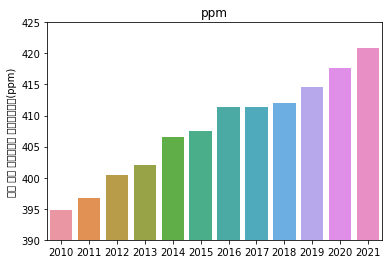

In [86]:
plt.figure(figsize=(6, 4))

sns.barplot(df.index, ppm)
plt.ylim(390, 425)
plt.title("ppm")
plt.show()